# 🛠️ Preparación de los Datos

## Extracción del Archivo Tratado




In [1]:
import pandas as pd

df = pd.read_csv("datos_tratados.csv")

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.27
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.80


## Eliminación de Columnas Irrelevantes

In [2]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [3]:
df = df.drop("customerID", axis=1)

df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

## Encoding

In [4]:
df["Churn"] = df["Churn"].map({"yes": 1, "no": 0})

In [5]:
df["Churn"].value_counts()

,count
Churn,
0,5398
1,1869


In [6]:
df["Churn"].dtype

dtype('int64')

In [7]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
df.select_dtypes(include="object").columns

Index([], dtype='object')

In [9]:
df.shape

(7267, 25)

## Verificación de la Proporción de Cancelación (Churn)

In [10]:
df["Churn"].value_counts(normalize=True) * 100

,proportion
Churn,
0,74.280996
1,25.719004


Se observa un desbalance moderado en la variable objetivo, con aproximadamente 74% de clientes que permanecen activos y 26% que cancelan el servicio. Debido a esta distribución, se priorizarán métricas como recall y ROC-AUC en la evaluación del modelo, en lugar de depender únicamente del accuracy.

## Balanceo de Clases

Se observa un desbalance moderado en la variable objetivo (74% vs 26%).  
Dado que no es un desbalance severo, no se aplicarán técnicas de remuestreo como SMOTE.  

En su lugar, se utilizará el parámetro class_weight="balanced" durante el entrenamiento de los modelos para compensar el desbalance.

# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

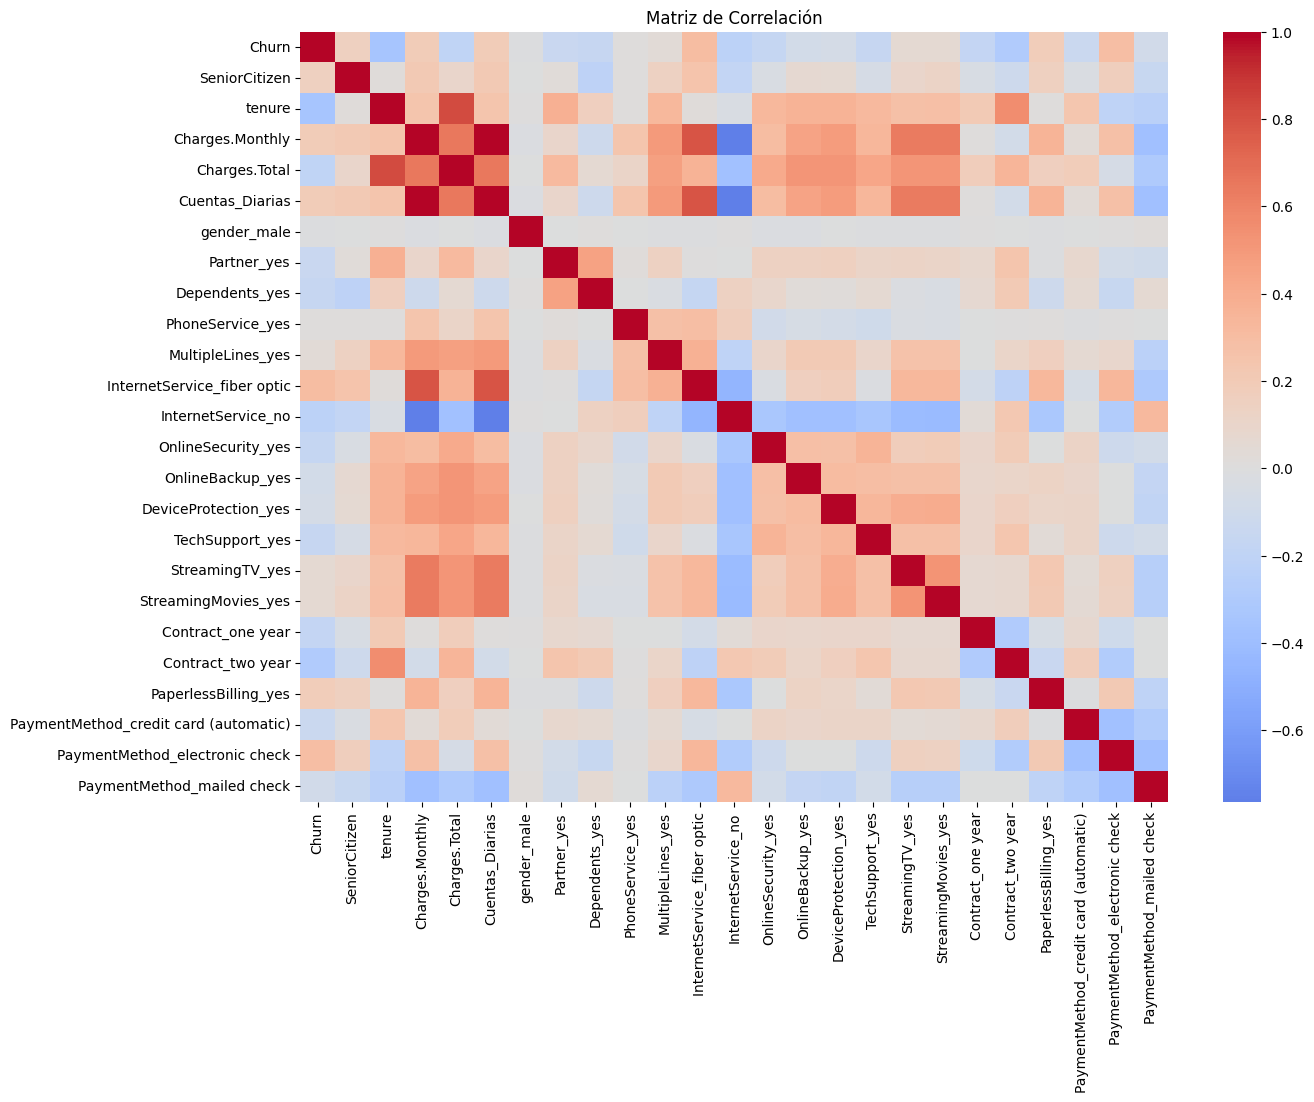

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()

In [12]:
corr_churn = df.corr()["Churn"].sort_values(ascending=False)
corr_churn

,Churn
Churn,1.000000
InternetService_fiber optic,0.300949
PaymentMethod_electronic check,0.294626
Cuentas_Diarias,0.189918
Charges.Monthly,0.189866
PaperlessBilling_yes,0.186666
SeniorCitizen,0.146733
StreamingTV_yes,0.062430
StreamingMovies_yes,0.060586
MultipleLines_yes,0.039343


In [13]:
corr_churn.head(10)

,Churn
Churn,1.000000
InternetService_fiber optic,0.300949
PaymentMethod_electronic check,0.294626
Cuentas_Diarias,0.189918
Charges.Monthly,0.189866
PaperlessBilling_yes,0.186666
SeniorCitizen,0.146733
StreamingTV_yes,0.062430
StreamingMovies_yes,0.060586
MultipleLines_yes,0.039343


In [14]:
corr_churn.tail(10)

,Churn
PaymentMethod_credit card (automatic),-0.131085
Partner_yes,-0.148546
TechSupport_yes,-0.160440
Dependents_yes,-0.161384
OnlineSecurity_yes,-0.166828
Contract_one year,-0.173958
Charges.Total,-0.193345
InternetService_no,-0.224051
Contract_two year,-0.295138
tenure,-0.344079


El análisis de correlación mostró que el servicio de fibra óptica y el pago mediante cheque electrónico presentan la mayor asociación positiva con la cancelación. Asimismo, los cargos mensuales elevados incrementan la probabilidad de churn. En contraste, la antigüedad del cliente y los contratos de dos años presentan una fuerte correlación negativa, indicando mayor retención.

## Análisis Dirigido

In [15]:
df_raw = pd.read_csv("datos_tratados.csv")

Tiempo de contrato (tenure) × Cancelación

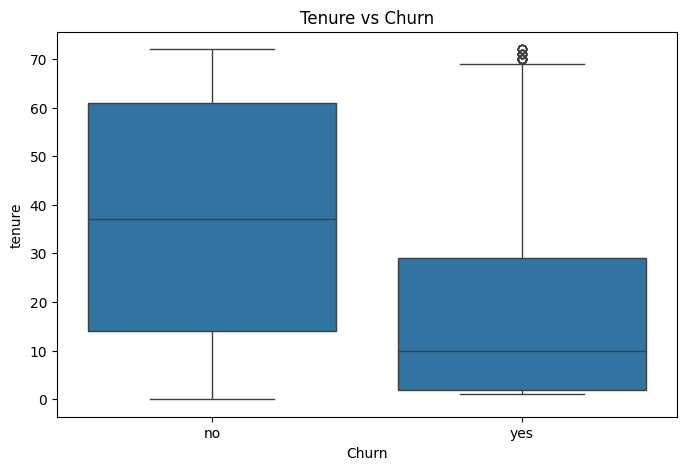

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df_raw)
plt.title("Tenure vs Churn")
plt.show()

El análisis dirigido muestra una diferencia clara en la antigüedad entre clientes que cancelan y los que permanecen activos. Los clientes con churn presentan una mediana significativamente menor de tenure, evidenciando que el riesgo de abandono es mayor en los primeros meses del servicio. Esto sugiere la necesidad de implementar estrategias de fidelización temprana.

La empresa debería:

* Implementar estrategias de retención temprana (primeros 6–12 meses)
* Ofrecer incentivos de fidelización en el primer año
* Hacer seguimiento especial a clientes nuevos

Porque el abandono ocurre principalmente al inicio de la relación.

Gasto Total × Cancelación

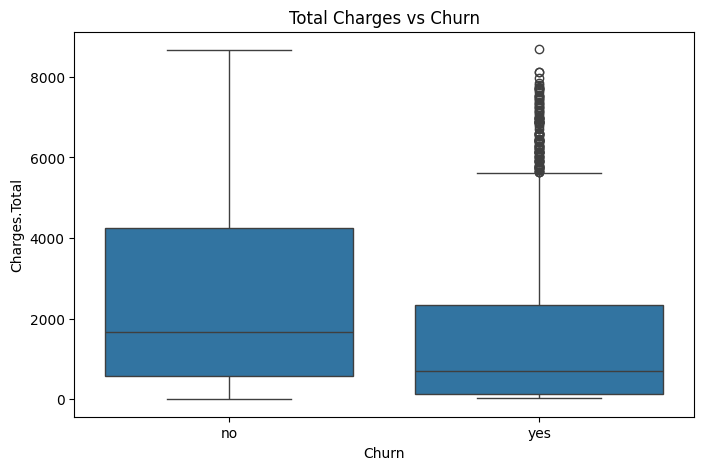

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Charges.Total", data=df_raw)
plt.title("Total Charges vs Churn")
plt.show()

Los clientes que cancelan muestran una mediana de gasto mensual más alta en comparación con los clientes que no cancelan. Esto sugiere que los planes de mayor costo podrían estar asociados con una mayor probabilidad de abandono, posiblemente por sensibilidad al precio o por una percepción insuficiente del valor recibido.

La empresa debería:

* Revisar la propuesta de valor de los planes premium.
* Implementar seguimiento proactivo a clientes de alto pago durante los primeros meses.
* Diseñar beneficios exclusivos que aumenten la percepción de valor.
* Aplicar estrategias de retención temprana para clientes con facturación alta.

Gasto Mensual × Cancelación

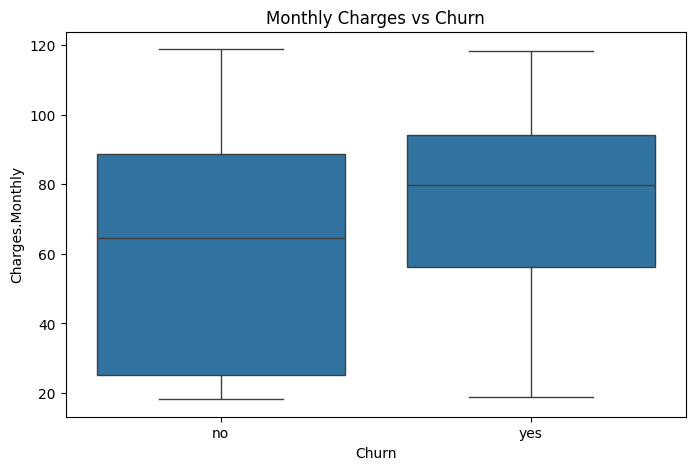

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Charges.Monthly", data=df_raw)
plt.title("Monthly Charges vs Churn")
plt.show()

El gasto total acumulado es significativamente menor en los clientes que cancelan. Sin embargo, este resultado está estrechamente relacionado con la baja antigüedad de estos clientes. Al permanecer menos tiempo en el servicio, el monto total facturado es naturalmente menor.

Por tanto, el bajo gasto total no es causa del churn, sino consecuencia de la cancelación temprana.

La empresa debería:

* Enfocar estrategias de fidelización en el onboarding (primeros 3–6 meses).
* Implementar programas de acompañamiento inicial.
* Detectar señales tempranas de insatisfacción.
* Priorizar retención temprana como estrategia de maximización de valor del cliente (Customer Lifetime Value).


Tipo de Contrato × Cancelación

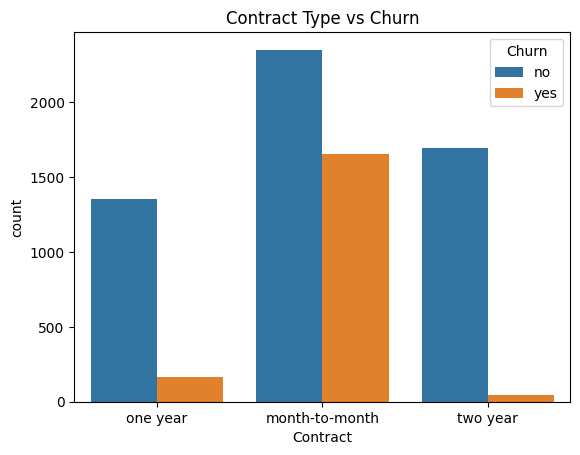

In [19]:
sns.countplot(x="Contract", hue="Churn", data=df_raw)
plt.title("Contract Type vs Churn")
plt.show()

El análisis muestra que los clientes con contrato mensual presentan una tasa significativamente mayor de cancelación en comparación con aquellos que poseen contratos de uno o dos años. En particular, los contratos de dos años evidencian niveles mínimos de churn, lo que indica que el compromiso contractual prolongado actúa como un factor protector frente al abandono.

La empresa debería:

* Incentivar migración de month-to-month a planes anuales
* Ofrecer descuentos por contratos largos
* Aplicar campañas de retención enfocadas en clientes mensuales

# 🤖 Modelado Predictivo

## Separación de Datos

In [20]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [22]:
print("Train distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))

Train distribution:
Churn
0    0.742818
1    0.257182
Name: proportion, dtype: float64

Test distribution:
Churn
0    0.742779
1    0.257221
Name: proportion, dtype: float64


## Creación de Modelos

### Modelo 1: Regresión Logística (requiere estandarización)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

In [25]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [26]:
y_pred_log = log_model.predict(X_test_scaled)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

=== Logistic Regression ===
Accuracy: 0.7427785419532325

Confusion Matrix:
[[777 303]
 [ 71 303]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1080
           1       0.50      0.81      0.62       374

    accuracy                           0.74      1454
   macro avg       0.71      0.76      0.71      1454
weighted avg       0.81      0.74      0.76      1454



**Interpretación:**

* Accuracy: 0.74 (74%)

  Coincide casi exactamente con la clase mayoritaria (74% no churn). Esto significa que el modelo está aprendiendo algo real, no está roto como antes.

  *Matriz de Confusión*

  * 777 clientes correctamente clasificados como no churn

  * 303 clientes no churn mal clasificados

  * 303 clientes churn correctamente detectados

  * 71 churn no detectados

* Recall clase 1 = 0.81

  Esto significa: El modelo detecta el 81% de los clientes que realmente cancelan.
  
  En churn, esto es MUY bueno.

  Porque en negocio lo importante es: Detectar clientes que se van para poder retenerlos.

📌 Precisión clase 1 = 0.50

De los clientes que el modelo predice como churn:

  * 50% realmente cancelan
  * 50% serían falsas alarmas

Esto es aceptable en modelos de retención, porque: *Es mejor contactar algunos clientes extra que dejar ir a clientes que sí iban a cancelar.*

### Modelo 2: Random Forest (sin escalado)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [29]:
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.7861072902338377

Confusion Matrix:
[[969 111]
 [200 174]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1080
           1       0.61      0.47      0.53       374

    accuracy                           0.79      1454
   macro avg       0.72      0.68      0.69      1454
weighted avg       0.77      0.79      0.78      1454



**Interpretación:**

* Accuracy: 0.79 (79%)

  El modelo clasifica correctamente el 79% de los clientes en general.

  Pero como el dataset tiene 74% de clientes que NO cancelan, eso significa que el accuracy no es suficiente para evaluar churn, porque podría estar favoreciendo la clase mayoritaria.

* Matriz de Confusión

  - 969 clientes activos correctamente clasificados

  - 111 clientes activos mal clasificados como churn

  - 174 clientes que cancelaron fueron correctamente detectados

  - 200 clientes que cancelaron NO fueron detectados

  🔴 Aquí está el problema: 200 clientes que realmente cancelaron no fueron identificados.

* Recall de la clase 1 (Churn)

  Recall = 0.47

  Eso significa: El modelo solo detecta el 47% de los clientes que realmente cancelan.
  Más de la mitad de los clientes que se van no serían identificados, para un modelo de prevención de churn, esto es bajo.

* Precision de la clase 1

  Precision = 0.61

  De los clientes que el modelo predice como churn: 61% realmente cancelan. Eso es bueno en términos de exactitud de alerta pero el problema no es la precisión, el problema es que detecta pocos churn reales.

* F1-score (clase 1)

  F1 = 0.53

  Es una métrica que combina precisión y recall. Comparado con la logística (0.62), es más bajo.


En términos de negocio: Si la empresa usa este modelo, más del 50% de los clientes que cancelarán no serán detectados a tiempo.

## Evaluación de los Modelos



In [31]:
print("Logística - Train:", accuracy_score(y_train, log_model.predict(X_train_scaled)))
print("Logística - Test:", accuracy_score(y_test, log_model.predict(X_test_scaled)))


print("Random Forest - Train:", accuracy_score(y_train, rf_model.predict(X_train)))
print("Random Forest - Test:", accuracy_score(y_test, y_pred_rf))


Logística - Train: 0.7421297092723207
Logística - Test: 0.7427785419532325
Random Forest - Train: 0.9910545329434027
Random Forest - Test: 0.7861072902338377


**Análisis de Overfitting**

* ***Regresión Logística***

  - Train: 0.7421
  - Test: 0.7428

  Son prácticamente iguales.
  
  *Interpretación:*

  - No hay sobreajuste.

  - El modelo generaliza bien.

  - Tiene estabilidad.

  - Es consistente entre entrenamiento y prueba.

  **Este es un comportamiento ideal.**

* ***Random Forest***

  - Train: 0.9910
  - Test: 0.7861

  Diferencia grande (más de 20 puntos porcentuales).

  *Interpretación:*

  - Claramente hay overfitting.

  - El modelo aprendió demasiado los datos de entrenamiento.

  - Tiene alta varianza.

  - No generaliza tan bien como parece.

El modelo de Regresión Logística obtuvo una exactitud de 74.28% en el conjunto de prueba y mostró un comportamiento estable al presentar resultados similares en entrenamiento (74.21%) y prueba, lo que indica ausencia de sobreajuste.

Por otro lado, el modelo Random Forest alcanzó una exactitud de 78.61% en el conjunto de prueba, pero obtuvo 99.10% en el conjunto de entrenamiento, evidenciando sobreajuste. Esta diferencia sugiere que el modelo aprendió en exceso los datos de entrenamiento, reduciendo su capacidad de generalización.

En términos de detección de cancelación, la Regresión Logística alcanzó un recall de 81% para la clase churn, superando ampliamente al Random Forest (47%). Dado que el objetivo del proyecto es anticipar la cancelación de clientes, la Regresión Logística resulta más adecuada estratégicamente.

# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

### Importancia en Regresión Logística

In [32]:
import pandas as pd

coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": log_model.coef_[0]
})

coeficientes = coeficientes.sort_values(by="Coeficiente", ascending=False)
coeficientes.head(10)


,Variable,Coeficiente
10,InternetService_fiber optic,0.694854
3,Charges.Total,0.640898
16,StreamingTV_yes,0.227029
17,StreamingMovies_yes,0.219682
20,PaperlessBilling_yes,0.181246
22,PaymentMethod_electronic check,0.174683
9,MultipleLines_yes,0.151674
0,SeniorCitizen,0.085969
14,DeviceProtection_yes,0.072189
8,PhoneService_yes,0.022811


In [33]:
coeficientes.tail(10)

,Variable,Coeficiente
5,gender_male,-0.041281
7,Dependents_yes,-0.050236
12,OnlineSecurity_yes,-0.077188
15,TechSupport_yes,-0.087324
18,Contract_one year,-0.271887
4,Cuentas_Diarias,-0.398946
2,Charges.Monthly,-0.457072
19,Contract_two year,-0.577998
11,InternetService_no,-0.603218
1,tenure,-1.325167


El análisis de los coeficientes de la Regresión Logística permitió identificar que el tiempo de permanencia (tenure) es la variable más determinante en la predicción de cancelación, mostrando una relación inversa significativa con el churn. Esto indica que los clientes nuevos presentan mayor riesgo de cancelar el servicio.

Asimismo, los contratos de largo plazo (uno y dos años) reducen considerablemente la probabilidad de cancelación, mientras que los contratos mensuales se asocian con mayor riesgo.

Se observó que el servicio de fibra óptica y el mayor gasto acumulado incrementan la probabilidad de churn, lo que sugiere que los clientes con servicios premium presentan mayor sensibilidad al precio o mayores expectativas de calidad.

Estos hallazgos permiten concluir que la estabilidad contractual y la antigüedad del cliente son factores clave para la retención.

### Importancia en Random Forest

In [34]:
importancias_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf_model.feature_importances_
})

importancias_rf = importancias_rf.sort_values(by="Importancia", ascending=False)
importancias_rf.head(10)


,Variable,Importancia
3,Charges.Total,0.166011
1,tenure,0.151753
2,Charges.Monthly,0.134392
4,Cuentas_Diarias,0.112902
19,Contract_two year,0.059998
10,InternetService_fiber optic,0.047748
22,PaymentMethod_electronic check,0.031116
18,Contract_one year,0.027761
20,PaperlessBilling_yes,0.025752
5,gender_male,0.023393


El análisis de importancia del modelo Random Forest confirmó los hallazgos obtenidos con la Regresión Logística. Las variables con mayor relevancia fueron el gasto total, el tiempo de permanencia (tenure) y el gasto mensual.

La coincidencia entre ambos modelos fortalece la evidencia de que la antigüedad del cliente y el tipo de contrato son factores determinantes en la cancelación del servicio.

En particular, los contratos de largo plazo y una mayor permanencia reducen el riesgo de churn, mientras que mayores niveles de gasto y el servicio de fibra óptica se asocian con mayor probabilidad de cancelación.

# Conclusión

## Objetivo del Proyecto

El presente análisis tuvo como objetivo desarrollar modelos predictivos capaces de anticipar la cancelación de clientes (churn), permitiendo a la empresa identificar de manera temprana a aquellos usuarios con mayor probabilidad de abandonar el servicio.

Se implementaron dos modelos de clasificación: **Regresión Logística** y **Random Forest**, evaluados mediante métricas como exactitud, precisión, recall, F1-score y matriz de confusión.

## Rendimiento de los Modelos

El modelo de **Regresión Logística** obtuvo una exactitud de 74.28% en el conjunto de prueba y mostró estabilidad entre entrenamiento (74.21%) y prueba, evidenciando buena capacidad de generalización y ausencia de sobreajuste.

Por su parte, el modelo **Random Forest** alcanzó mayor exactitud general (78.61%), pero presentó un marcado sobreajuste (99% en entrenamiento frente a 78% en prueba). Además, su capacidad para detectar clientes que cancelan (recall de 47%) fue considerablemente inferior a la de la Regresión Logística (81%).

Dado que el objetivo principal del proyecto es anticipar la cancelación, el modelo de **Regresión Logística** fue seleccionado como el más adecuado, al presentar mejor capacidad para identificar clientes en riesgo.

## Factores Principales que Influyen en la Cancelación

El análisis de importancia de variables, tanto en la Regresión Logística como en Random Forest, permitió identificar factores estructurales consistentes:

### 1. Tiempo de permanencia (tenure)

Es la variable más determinante del modelo.

* A mayor antigüedad, menor probabilidad de cancelación.
* Los clientes nuevos representan el segmento de mayor riesgo.

Este hallazgo sugiere que el churn es más probable en etapas tempranas del ciclo de vida del cliente.

### 2. Tipo de contrato

* Los contratos de uno y dos años reducen significativamente la probabilidad de cancelación.
* Los contratos mensuales presentan mayor riesgo.

La estabilidad contractual actúa como mecanismo de retención natural.

### 3. Nivel de gasto

* El gasto total acumulado se asocia con mayor probabilidad de cancelación.
* Las variables monetarias fueron altamente relevantes en ambos modelos.

Esto indica sensibilidad al precio y posible percepción de alto costo del servicio.


### 4. Tipo de servicio

* El servicio de fibra óptica mostró asociación positiva con el churn.
* Servicios adicionales como streaming también incrementan el riesgo.

Esto puede relacionarse con mayores expectativas de calidad o competencia en el mercado premium.


## Perfil del Cliente con Mayor Riesgo

El cliente con mayor probabilidad de cancelación presenta las siguientes características:

* Bajo tiempo de permanencia
* Contrato mensual
* Servicio de fibra óptica
* Alto gasto total
* Uso de facturación electrónica y pago digital

Este perfil permite segmentar estrategias preventivas.

## Estrategias de Retención Propuestas

Con base en los hallazgos, se proponen las siguientes acciones estratégicas:

### 1️⃣ Estrategias para clientes nuevos

* Programas de fidelización durante los primeros meses.
* Seguimiento personalizado en el primer año de servicio.
* Ofertas exclusivas de bienvenida.

### 2️⃣ Incentivar contratos de largo plazo

* Descuentos por migrar de contrato mensual a anual.
* Beneficios adicionales para contratos de dos años.
* Programas de recompensas por permanencia.

### 3️⃣ Gestión de clientes de alto gasto

* Análisis de satisfacción en clientes premium.
* Mejoras en calidad de servicio para fibra óptica.
* Planes personalizados para evitar percepción de sobrecosto.


### 4️⃣ Sistema de alerta temprana

Implementar el modelo predictivo como herramienta operativa para:

* Detectar clientes con alta probabilidad de churn.
* Activar campañas de retención antes de la cancelación.
* Priorizar esfuerzos comerciales en segmentos de mayor riesgo.


# Conclusión General

El análisis confirma que la cancelación de clientes no es un fenómeno aleatorio, sino estructuralmente explicado por factores como la antigüedad del cliente, el tipo de contrato y el nivel de gasto.

La implementación de modelos predictivos, especialmente la Regresión Logística, permite anticipar la cancelación con alta capacidad de detección (81% de recall), convirtiéndose en una herramienta estratégica para reducir la pérdida de clientes y mejorar la rentabilidad empresarial.
